# <center> Natural Language Processing </center>
### <center> Problem Statement 5 </center>
## <center> Group 26 </center>

|     | BITS ID     | Name                              | Contribution |
| --- | ----------- | --------------------------------- | ------------ |
| 1   | 2024AA05372       | KARTHIKEYAN J                     | 100%         |
| 2   | 2024AA05187 | JANGALE SAVEDANA SUBHASH PRATIBHA | 100%         |
| 3   | 2024AA05188 | GANAPATHY SUBRAMANIAN S           | 100%         |
| 4   |      2024AA05269       | ANANDAN A                         | 100%         |
| 5   |       2024AA05067      | ANUSHKA SHARMA                    | 100%         |

In [1]:
import pandas as pd

df = pd.read_csv('Amazon Cell Phone reviews.csv')
df.head(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('treebank')
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treeb

True

## 1. Data Preprocessing

### a) Cleaning: Remove all punctuation, numbers, and special characters from the dataset. Eliminate commonly used stop words

In [3]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['full_review'] = df['title'].fillna('') + ' ' + df['body'].fillna('')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['full_review'].apply(clean_text)

df[['title', 'body', 'cleaned_review']].head()

,title,body,cleaned_review
0,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,def best worst samsung awhile absolute doo doo...
1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,text messaging doesnt work due software issue ...
2,Love This Phone,"This is a great, reliable phone. I also purcha...",love phone great reliable phone also purchased...
3,"Love the Phone, BUT...!","I love the phone and all, because I really did...",love phone love phone really need one didnt ex...
4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,great phone service options lousy case phone g...


**Justification:**

stop_words holds common English words to be excluded.

full_review is created by combining title and body.

clean_text() function:

*   stop_words holds common English words to be excluded.
*   full_review is created by combining title and body.

**clean_text() function:**

*   Removes special characters and numbers.  
*   Converts text to lowercase.
*   Removes stopwords.
*   Applied to every review using .apply().



**Purpose:**

Preprocess text for vectorization and similarity analysis by cleaning and normalizing it.

### b) Normalization: Apply stemming or lemmatization techniques to convert words to their base or root forms.

In [4]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['full_review'].apply(clean_and_lemmatize)

df[['title', 'body', 'cleaned_review']].head()

,title,body,cleaned_review
0,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,def best worst samsung awhile absolute doo doo...
1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,text messaging doesnt work due software issue ...
2,Love This Phone,"This is a great, reliable phone. I also purcha...",love phone great reliable phone also purchased...
3,"Love the Phone, BUT...!","I love the phone and all, because I really did...",love phone love phone really need one didnt ex...
4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,great phone service option lousy case phone gr...


**Justification:**

**Uses word tokenization and lemmatization:**

*   lemmatize_text() reduces each word to its base form.
*   For example, “running” → “run”, “better” → “good”.
*   Applied to the cleaned reviews.


**Purpose:**

Further normalize the text for improved semantic understanding.

In [5]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def clean_and_Stemming(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation, numbers
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['full_review'].apply(clean_and_Stemming)

df[['title', 'body', 'cleaned_review']].head()

,title,body,cleaned_review
0,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,def best worst samsung awhil absolut doo doo r...
1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,text messag doesnt work due softwar issu nokia...
2,Love This Phone,"This is a great, reliable phone. I also purcha...",love phone great reliabl phone also purchas ph...
3,"Love the Phone, BUT...!","I love the phone and all, because I really did...",love phone love phone realli need one didnt ex...
4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,great phone servic option lousi case phone gre...


#### --------------------------------------------------------------------------------------------------------------
#### **Text Preprocessing with Stemming using NLTK's PorterStemmer**
#### --------------------------------------------------------------------------------------------------------------

#### **1. Import and initialize stemmer**
#### - We use NLTK's PorterStemmer to reduce words to their root forms.
#### - For example: "running" → "run", "played" → "play".
#### - Stemming is rule-based and efficient, but may return non-dictionary roots.

#### **2. Define `clean_and_Stemming(text)` function**
#### - Checks if input is a string; if not (e.g., NaN), returns an empty string.
#### - Cleans text using regex: removes punctuation, numbers, and special characters.
#### - Converts text to lowercase for consistency.
#### - Tokenizes the cleaned text using `nltk.word_tokenize()`.
#### - Removes stopwords to eliminate common, uninformative words like "is", "the", "and".
#### - Applies stemming to each token using `stemmer.stem(word)`.
#### - Joins the stemmed words into a single cleaned review string.

#### **3. Apply the function to the dataset**
#### - Applies `clean_and_Stemming()` to every row in the `full_review` column.
#### - Stores the processed text in a new column `cleaned_review`.

#### **4. Display results for verification**
#### - Prints the original title, body, and cleaned_review columns.
#### - Helps visually confirm that stemming and cleaning are applied correctly.

#### **Note:**
#### - Stemming is faster than lemmatization but may be less precise.
#### - Lemmatization returns proper dictionary words, while stemming may truncate words oddly (e.g., "comput").

#### - Suitable when speed is more important than exact linguistic correctness.


## 2. POS Tagging and Frequency Analysis

### Use a POS tagging algorithm to label each word in the dataset.

### a) Compute the frequency of each POS tag throughout the dataset.
### b) Identify and display the most frequently occurring POS tags along with their counts.
### c) Extract and print sentences that contain selected POS tags (e.g., nouns, verbs).

In [6]:
from nltk import word_tokenize, pos_tag
from collections import Counter

def get_pos_tags(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

df['pos_tags'] = df['full_review'].apply(get_pos_tags)

pos_counts = Counter()
for tags in df['pos_tags']:
    pos_only = [tag for word, tag in tags]
    pos_counts.update(pos_only)

top_pos_tags = pos_counts.most_common(10)
print("Top POS tags and their counts:")
for tag, count in top_pos_tags:
    print(f"{tag}: {count}")

noun_tags = [tag for tag in pos_counts if re.match(r'^NN', tag)]
verb_tags = [tag for tag in pos_counts if re.match(r'^VB', tag)]
selected_tags = set(noun_tags + verb_tags)
# selected_tags = {'NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
sentences_with_selected_tags = []

for index, row in df.iterrows():
    tagged = row['pos_tags']
    if any(tag in selected_tags for _, tag in tagged):
        sentences_with_selected_tags.append(row['full_review'])

print("\nSample sentences containing selected POS tags (nouns or verbs):\n")
for sent in sentences_with_selected_tags[:5]:
    print("-", sent)

Top POS tags and their counts:
NN: 19765
DT: 12637
IN: 11628
PRP: 10207
JJ: 9669
RB: 8914
.: 8223
NNP: 7493
VB: 5875
VBD: 5142

Sample sentences containing selected POS tags (nouns or verbs):

- Def not best, but not worst I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the p

#### ------------------------------------------------------------------------------------------------
#### **Part-of-Speech (POS) Tagging and Analysis of Reviews**
#### ------------------------------------------------------------------------------------------------

#### **1. Import required modules**
#### - `word_tokenize` for breaking text into individual words (tokens).
#### - `pos_tag` to assign a grammatical tag (e.g., noun, verb) to each token.
#### - `Counter` from `collections` to count the frequency of POS tags across all reviews.

#### **2. Define `get_pos_tags()` function**
#### - Accepts a text input and returns a list of tuples: (word, POS tag).
#### - Example: "Phones are great" → [('Phones', 'NNS'), ('are', 'VBP'), ('great', 'JJ')]

#### **3. Apply POS tagging to the dataset**
#### - The function is applied to each review in `full_review`.
#### - The results are stored in a new column `pos_tags` which contains tagged word lists.

#### **4. Compute POS tag frequencies across all reviews**
#### - Iterates through all tagged reviews.
#### - Extracts just the POS tags (ignores words).
#### - Updates a `Counter` to track how many times each POS tag appears.

#### **5. Identify the most common POS tags**
#### - Uses `Counter.most_common(10)` to list the top 10 tags by frequency.
#### - Prints each tag and its count.
#### - Useful for understanding the overall grammatical distribution of the dataset.

#### **6. Extract relevant POS tag types (nouns and verbs)**
#### - Filters tag types using regex:
####     - Tags starting with "NN" → Nouns (e.g., 'NN', 'NNS', 'NNP')
####     - Tags starting with "VB" → Verbs (e.g., 'VB', 'VBD', 'VBG')
#### - Combines these into a `selected_tags` set for matching.

#### **7. Find reviews containing selected POS tags**
#### - Iterates through the DataFrame row by row.
#### - For each row, checks if any of the POS tags match the `selected_tags` set.
#### - If matched, the full review is added to the `sentences_with_selected_tags` list.

#### **8. Display a few reviews with key POS tags**
#### - Prints 5 sample reviews that contain either nouns or verbs.
#### - This allows manual inspection of grammatically informative content.

####  **Purpose of this code:**
#### - Analyze grammatical patterns in user reviews.
#### - Understand which parts of speech are most dominant.
#### - Enable targeted linguistic filtering (e.g., extracting action-oriented or entity-related phrases).


In [7]:
import sys
!{sys.executable} -m pip install wordcloud

## 3. Visualization

### Generate visual representations to support your POS analysis:

### a. A bar chart to display POS tag frequencies
### b. A word cloud to highlight frequently used words

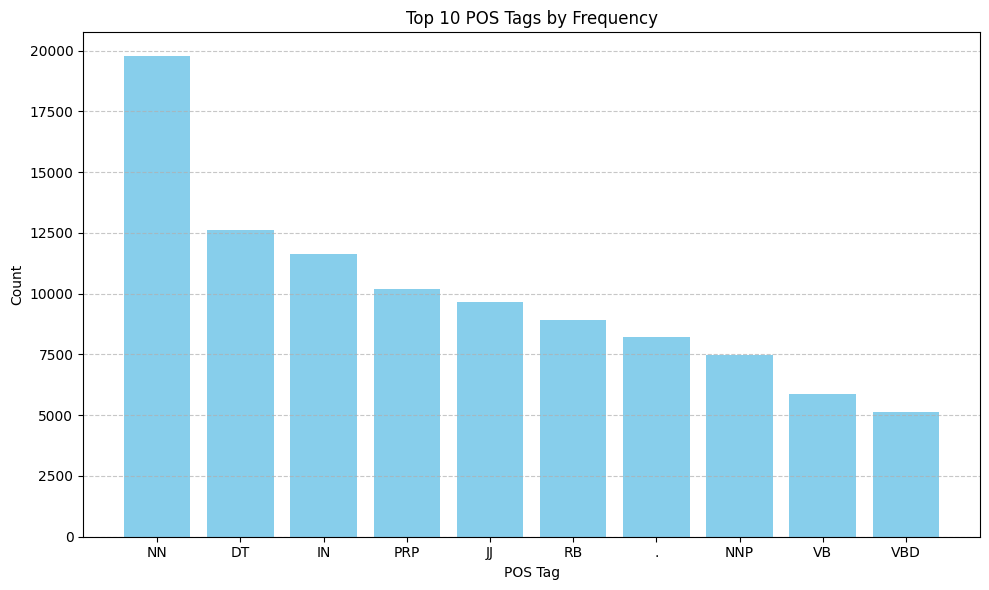

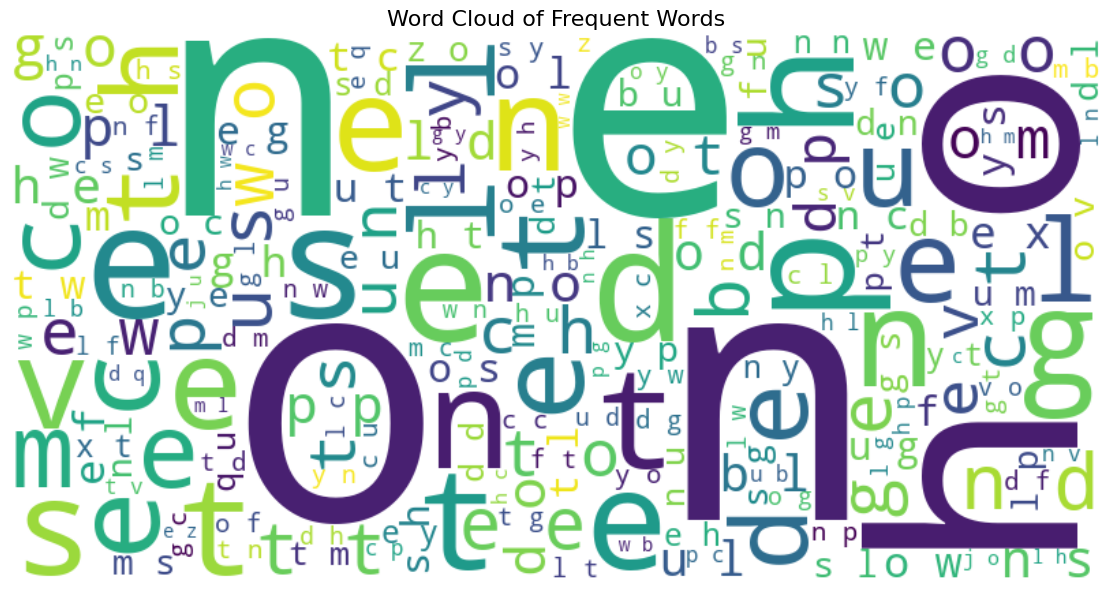

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = []
all_tags = Counter()

for review in df['full_review']:
    tokens = word_tokenize(review)
    tags = pos_tag(tokens)
    all_tags.update(tag for word, tag in tags)
    all_words.extend(clean_text(review))

top_tags = all_tags.most_common(10)
tags, counts = zip(*top_tags)

plt.figure(figsize=(10, 6))
plt.bar(tags, counts, color='skyblue')
plt.title('Top 10 POS Tags by Frequency')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

wordcloud_text = ' '.join(all_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words', fontsize=16)
plt.tight_layout()
plt.show()


#### --------------------------------------------------------------------------
#### **POS Tag Analysis and Word Visualization**
#### --------------------------------------------------------------------------

#### **1. Import necessary libraries**
#### - `matplotlib.pyplot` is used to create visual plots such as bar charts.
#### - `WordCloud` from `wordcloud` is used to generate a visual representation of word frequency.

#### **2. Initialize containers for tokens and POS tags**
#### - `all_words`: a list that will store all cleaned words from reviews for word cloud creation.
#### - `all_tags`: a `Counter` object to keep track of POS tag frequencies across all reviews.

#### **3. Loop through each review in `df['full_review']`**
#### - Tokenize the review using `word_tokenize()`.
#### - Apply `pos_tag()` to get POS tags and update `all_tags` with each tag.
#### - Clean each review using `clean_text()` (assumed to perform token cleaning, case normalization, stopword removal, etc.).
#### - Extend `all_words` with cleaned tokens for later word cloud generation.

#### **4. Bar Chart of Top POS Tags**
#### - `most_common(10)` retrieves the 10 most frequent POS tags.
#### - `tags` and `counts` are unpacked for plotting.
#### - A bar chart is plotted using `matplotlib` to show:
####     - POS tag categories on the x-axis.
####     - Their respective frequencies on the y-axis.
#### - Includes formatting features like `grid`, `tight_layout`, and `color` for better readability.

#### **5. Word Cloud of Frequent Words**
#### - Joins all the cleaned words into a single string (`wordcloud_text`) for word cloud input.
#### - `WordCloud()` generates an image where word size reflects frequency.
#### - Displayed using `imshow()` with `bilinear` interpolation for smooth rendering.
#### - Axis is turned off and a title is added for context.

#### **Purpose of this Code:**
#### - Provides a **visual summary of the most used POS tags** in user reviews.
#### - Helps in understanding the grammatical structure of text data.
#### - The word cloud gives an **intuitive feel of common content words**, aiding in thematic or sentiment exploration.
#### - Useful for presentations, exploratory data analysis (EDA), and report generation.


## 4. HMM POS Tagging

### Apply a Hidden Markov Model-based POS tagging approach to the first four rows of the dataset and display the results.

In [9]:
from nltk.corpus import treebank
from nltk.tag.hmm import HiddenMarkovModelTrainer
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

train_data = treebank.tagged_sents()

trainer = HiddenMarkovModelTrainer()
hmm_tagger = trainer.train_supervised(train_data)

sample_reviews = df['full_review'].head(4)

for i, review in enumerate(sample_reviews, start=1):
    tokens = word_tokenize(review)
    tagged = hmm_tagger.tag(tokens)
    print(f"\nReview {i} POS Tags (HMM):")
    print(tagged)


Review 1 POS Tags (HMM):
[('Def', 'NNP'), ('not', 'NNP'), ('best', 'NNP'), (',', 'NNP'), ('but', 'NNP'), ('not', 'NNP'), ('worst', 'NNP'), ('I', 'NNP'), ('had', 'NNP'), ('the', 'NNP'), ('Samsung', 'NNP'), ('A600', 'NNP'), ('for', 'NNP'), ('awhile', 'NNP'), ('which', 'NNP'), ('is', 'NNP'), ('absolute', 'NNP'), ('doo', 'NNP'), ('doo', 'NNP'), ('.', 'NNP'), ('You', 'NNP'), ('can', 'NNP'), ('read', 'NNP'), ('my', 'NNP'), ('review', 'NNP'), ('on', 'NNP'), ('it', 'NNP'), ('and', 'NNP'), ('detect', 'NNP'), ('my', 'NNP'), ('rage', 'NNP'), ('at', 'NNP'), ('the', 'NNP'), ('stupid', 'NNP'), ('thing', 'NNP'), ('.', 'NNP'), ('It', 'NNP'), ('finally', 'NNP'), ('died', 'NNP'), ('on', 'NNP'), ('me', 'NNP'), ('so', 'NNP'), ('I', 'NNP'), ('used', 'NNP'), ('this', 'NNP'), ('Nokia', 'NNP'), ('phone', 'NNP'), ('I', 'NNP'), ('bought', 'NNP'), ('in', 'NNP'), ('a', 'NNP'), ('garage', 'NNP'), ('sale', 'NNP'), ('for', 'NNP'), ('$', 'NNP'), ('1', 'NNP'), ('.', 'NNP'), ('I', 'NNP'), ('wonder', 'NNP'), ('y', 'NNP

#### -----------------------------------------------------------------------------------------------------
#### **POS Tagging using HMM (Hidden Markov Model) Trained on Treebank**
#### -----------------------------------------------------------------------------------------------------

#### **1. Import necessary modules**
#### - `treebank` corpus: Contains a labeled dataset (Penn Treebank) used for training POS taggers.
#### - `HiddenMarkovModelTrainer`: Trains an HMM-based POS tagger using supervised learning.
#### - `warnings`: Used to suppress any runtime warnings from nltk's training or tagging process.

#### **2. Load Treebank tagged sentences**
#### - `treebank.tagged_sents()` provides high-quality manually annotated sentences.
#### - Each sentence is a list of (word, POS) pairs, suitable for supervised training.

#### **3. Train the HMM tagger**
#### - `HiddenMarkovModelTrainer().train_supervised(train_data)` creates a statistical model.
#### - The model learns transitions (e.g., what POS tag follows another) and emissions (e.g., what words belong to which POS tags).
#### - This is a **generative model**, well-suited for sequential data like natural language.

#### **4. Select a few sample reviews**
#### - Extracts the first 4 rows from the `full_review` column for demonstration.
#### - Keeps it short to quickly observe how well the tagger performs on real, noisy review text.

#### **5. Apply the trained HMM tagger**
#### - Each review is tokenized using `word_tokenize()`.
#### - The HMM model then tags each token with its most likely POS tag.
#### - Results are printed with review index for clarity.

#### **Purpose of this Code:**
#### - Demonstrates the application of a **statistical POS tagger** trained on clean, labeled linguistic data.
#### - Useful to compare model performance with simpler taggers (like NLTK’s default or rule-based taggers).
#### - Highlights how well traditional models like HMM can generalize to **noisy user-generated content** (e.g., customer reviews).
#### - Serves as a baseline for comparison against **modern taggers** like those based on spaCy or transformers.

#### Ideal for exploring sequential dependencies in text and for building linguistic pipelines in older or low-resource NLP systems.


## 5. POS and NER Integration

### a) Select a few representative sentences and annotate each word with both its POS tag and Named Entity Recognition (NER) label.

### b) Identify examples where POS and NER tags either contradict or complement one another. Explain how this relationship can be leveraged to improve the quality of text analysis.


In [10]:
from nltk import ne_chunk
from nltk.tree import Tree

df = df.dropna(subset=['body'])

sample_sentences = df['body'].dropna().sample(4, random_state=42).tolist()

def extract_pos_ner(sentence):
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)
    ner_tree = ne_chunk(pos_tags)

    annotations = []
    for chunk in ner_tree:
        if isinstance(chunk, Tree):
            ne_label = chunk.label()
            for token, pos in chunk:
                annotations.append((token, pos, ne_label))
        else:
            token, pos = chunk
            annotations.append((token, pos, 'O'))

    return annotations

for sent in sample_sentences:
    print(f"\n Review Sample:\n{sent}\n")
    print(f"{'Token':12} {'POS':6} {'NER':12}")
    print("-" * 30)
    for word, pos, ner in extract_pos_ner(sent):
        print(f"{word:12} {pos:6} {ner:12}")


 Review Sample:
Definitely was able to use this phone for awhile.

Token        POS    NER         
------------------------------
Definitely   RB     O           
was          VBD    O           
able         JJ     O           
to           TO     O           
use          VB     O           
this         DT     O           
phone        NN     O           
for          IN     O           
awhile       NN     O           
.            .      O           

 Review Sample:
We received the phone only to discover the charger did not fit into phone. We had to immediately buy a new charger at Verizon. The following day the rubber lid placed on side of phone fell off. After searching for it for hours in vain.... we placed a strip of electricians tape over one inch opening. It is an opening showing intricate metal parts that should be protected from debris. On a final note we are not going to buy a used phone ever again.

Token        POS    NER         
------------------------------
We   

#### -------------------------------------------------------------------------------------------------------------
#### **Named Entity Recognition (NER) and POS Tagging on Review Samples**
#### -------------------------------------------------------------------------------------------------------------

#### **1. Import NER-related tools from NLTK**
#### - `ne_chunk` is used to perform named entity recognition based on POS tags.
#### - `Tree` is used to check if a chunk in the parse tree is a named entity (like a PERSON or ORGANIZATION).

#### **2. Remove rows with missing 'body' values**
#### - To ensure sampling is done only on valid text entries.
#### - `dropna(subset=['body'])` filters out rows where the review body is NaN.

#### **3. Select a few random sample reviews**
#### - Selects 4 random review bodies using `.sample(4, random_state=42)` to ensure reproducibility.
#### - Converts them into a list of strings using `.tolist()` for further processing.

#### **4. Define `extract_pos_ner()` function**
#### - **Tokenization**: Breaks the sentence into words.
#### - **POS Tagging**: Uses `pos_tag()` to assign parts of speech.
#### - **NER Tree**: Applies `ne_chunk()` to extract named entities.
#### - Traverses the output parse tree:
####     - If the chunk is a `Tree`, it represents a named entity.
####     - Retrieves each token, its POS tag, and the named entity label (e.g., `PERSON`, `LOCATION`, `ORGANIZATION`).
####     - If not a named entity (just a word), labels it with `'O'` (outside of named entities).

#### **5. Loop through each sample sentence**
#### - Prints the original review sentence.
#### - For each token in the sentence, prints:
####     - The **word (token)**.
####     - Its **POS tag** (e.g., NN for noun, VB for verb).
####     - Its **NER tag** (e.g., PERSON, GPE, or 'O' if not part of an entity).
#### - Output is neatly formatted into columns for readability.

#### **Purpose of this Code:**
#### - Extracts both syntactic (POS) and semantic (NER) information from user reviews.
#### - Helps identify mentions of people, locations, organizations, etc., within real customer feedback.
#### - Useful for downstream tasks such as:
####     - Named entity highlighting
####     - Semantic search
####     - Customer sentiment attribution to brands or people
.


#### **POS tag NNP (Proper Noun, Singular) agrees with NER as a named organization**.

#### **POS tag NN (common noun) misclassifies what should be NNP, but NER correctly identifies the entity.**

#### **This disagreement reveals NER can enrich POS tagging.**

| Case                     | Insight                                                       |
|--------------------------|---------------------------------------------------------------|
| POS is right, NER is wrong | Improve NER by using POS clues (e.g., NNP = likely entity)     |
| NER is right, POS is wrong | Fix POS tag using NER information                             |
| Both agree               | High confidence annotation                                     |
| Both disagree            | Candidate for review / active learning                         |
